### 분석결과

자료: 한국장학재단 대학별 평균등록금(2022.04.30)

### 등록금
* 삼육대 : 전국 388개 중 42위 (상위 10.82%) / 사립 331개중 41위 (상위 12.387%) / 7760939 원
* 가천대 : 전국 388개 중 14위 (상위 3.61% ) / 사립 331개중 13위 (상위 3.93% ) / 8263207	원
* 한성대 : 전국 388개 중 43위 (상위 11.082%)/ 사립 331개 중 42위(상위 12.688%) / 7741776 원 
* 수원대 : 전국 388개 중 50위 (상위 12.886%) /사립 331개 중 49위(상위 14.80%) / 7595302원

### 전국 사립대학 평균 등록금 (등록금0원 대학 제외)
* 5997360.558282209 원

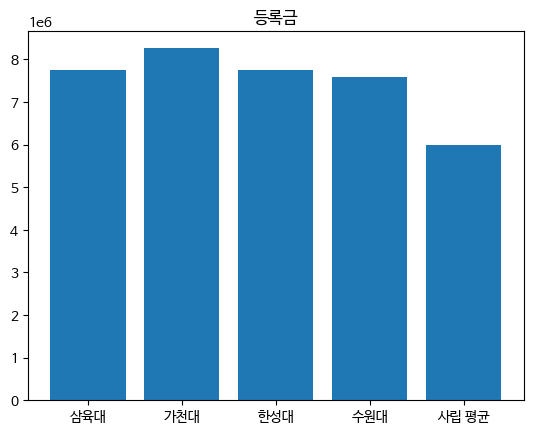

### 분석 코드

In [ ]:
# 한글설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
#기본패키지 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rc('font', family = 'NanumBarunGothic') #한글폰트 사용할 수 있도록

In [ ]:
df= pd.read_csv('한국장학재단_대학별 평균등록금 (1).csv', encoding = 'cp949')
df.tail()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원)
383,대학,사립,정석대학,서울,200,0,0
384,전문대학,사립,한국복지사이버대학,경북,2000,66000,2160000
385,대학,사립,한국열린사이버대학교,서울,3000,82500,2161333
386,대학,사립,한양사이버대학교,서울,9430,99000,2768017
387,대학,사립,화신사이버대학교,부산,1390,99000,2413237


In [ ]:
raw_data = df.copy()  

In [ ]:
df.isnull().sum()

학제별          0
설립별          0
대학명          0
지역별          0
입학정원 합(명)    0
평균입학금(원)     0
평균등록금(원)     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   학제별        388 non-null    object
 1   설립별        388 non-null    object
 2   대학명        388 non-null    object
 3   지역별        388 non-null    object
 4   입학정원 합(명)  388 non-null    int64 
 5   평균입학금(원)   388 non-null    int64 
 6   평균등록금(원)   388 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe()

,입학정원 합(명),평균입학금(원),평균등록금(원)
count,388.000000,388.000000,3.880000e+02
mean,5188.690722,101096.585052,5.593295e+06
std,12628.535537,103189.435006,2.002002e+06
min,0.000000,0.000000,0.000000e+00
25%,1195.250000,0.000000,4.146455e+06
50%,3242.500000,99000.000000,6.081564e+06
75%,6301.000000,198000.000000,7.104958e+06
max,236650.000000,500000.000000,9.034616e+06


In [ ]:
df_sort = df.sort_values(by='평균등록금(원)', ascending = False)
df_sort.head()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원)
177,대학,사립,한국공학대학교,경기,5520,0,9034616
41,대학,국공립,한국에너지공과대학교,전남,100,0,9000000
139,대학,사립,연세대학교,서울,19932,195000,8949735
172,대학,사립,추계예술대학교,서울,1038,160000,8778884
135,대학,사립,신한대학교,경기,5764,193600,8714105


In [ ]:
df_num = df['대학명'].unique()
len(df_num)

388

In [ ]:
lank = []
for i in range (len(df['대학명'])):
    lank.append(i+1)

In [ ]:
df_sort['등록금순위'] = lank
df_sort.head()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위
177,대학,사립,한국공학대학교,경기,5520,0,9034616,1
41,대학,국공립,한국에너지공과대학교,전남,100,0,9000000,2
139,대학,사립,연세대학교,서울,19932,195000,8949735,3
172,대학,사립,추계예술대학교,서울,1038,160000,8778884,4
135,대학,사립,신한대학교,경기,5764,193600,8714105,5


In [ ]:
df_sort.tail()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위
69,대학,사립,광주가톨릭대학교,전남,160,0,0,384
356,전문대학,사립,한국폴리텍 VII 대학 진주캠퍼스,경남,0,0,0,385
383,대학,사립,정석대학,서울,200,0,0,386
336,전문대학,사립,한국폴리텍 II 대학 화성캠퍼스,경기,0,0,0,387
207,전문대학,국공립,한국농수산대학(일반),전북,1690,0,0,388


In [ ]:
# 사립만 따로 분류하기

In [ ]:
df_private = df_sort[df_sort['설립별']=='사립']
df_private.head() 

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위
177,대학,사립,한국공학대학교,경기,5520,0,9034616,1
139,대학,사립,연세대학교,서울,19932,195000,8949735,3
172,대학,사립,추계예술대학교,서울,1038,160000,8778884,4
135,대학,사립,신한대학교,경기,5764,193600,8714105,5
154,대학,사립,이화여자대학교,서울,12747,189000,8689951,6


In [ ]:
# 사립등록금순위
p_lank = []
for j in range (len(df_private['대학명'])):
    p_lank.append(j+1)

In [ ]:
df_private['사립등록금순위'] = p_lank
print(len(df_private['대학명']))
df_private.head()

331


<ipython-input-15-ec21ed4ca46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_private['사립등록금순위'] = p_lank


,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
177,대학,사립,한국공학대학교,경기,5520,0,9034616,1,1
139,대학,사립,연세대학교,서울,19932,195000,8949735,3,2
172,대학,사립,추계예술대학교,서울,1038,160000,8778884,4,3
135,대학,사립,신한대학교,경기,5764,193600,8714105,5,4
154,대학,사립,이화여자대학교,서울,12747,189000,8689951,6,5


In [ ]:
df_private.tail(10)

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
381,전문대학,사립,영진사이버대학교,대구,2600,66000,2160000,374,322
143,대학,사립,영산선학대학교,전남,200,0,2000000,376,323
164,대학,사립,중앙승가대학교,경기,480,0,1760000,379,324
353,전문대학,사립,한국폴리텍 VII 대학 동부산캠퍼스,부산,20,0,1215000,380,325
358,전문대학,사립,한국폴리텍 특성화대학 로봇캠퍼스,경북,200,0,1082000,381,326
345,전문대학,사립,한국폴리텍 V 대학 순천캠퍼스,전남,0,0,0,383,327
69,대학,사립,광주가톨릭대학교,전남,160,0,0,384,328
356,전문대학,사립,한국폴리텍 VII 대학 진주캠퍼스,경남,0,0,0,385,329
383,대학,사립,정석대학,서울,200,0,0,386,330
336,전문대학,사립,한국폴리텍 II 대학 화성캠퍼스,경기,0,0,0,387,331


In [ ]:
zero_index = df_private[df_private['평균등록금(원)'] == 0].index
drop_zero_df = df_private.drop(zero_index)

In [ ]:
drop_zero_df.tail()

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
381,전문대학,사립,영진사이버대학교,대구,2600,66000,2160000,374,322
143,대학,사립,영산선학대학교,전남,200,0,2000000,376,323
164,대학,사립,중앙승가대학교,경기,480,0,1760000,379,324
353,전문대학,사립,한국폴리텍 VII 대학 동부산캠퍼스,부산,20,0,1215000,380,325
358,전문대학,사립,한국폴리텍 특성화대학 로봇캠퍼스,경북,200,0,1082000,381,326


### 대학별 등록금 확인

In [ ]:
s_p_data = df_private[ df_private['대학명']== '삼육대학교']
s_p_data

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
107,대학,사립,삼육대학교,서울,4629,170000,7760939,42,41


In [ ]:
g_p_data = df_private[ df_private['대학명']== '가천대학교']
g_p_data

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
48,대학,사립,가천대학교,경기,15759,176800,8263207,14,13


In [ ]:
h_p_data = df_private[ df_private['대학명']== '한성대학교']
h_p_data

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
189,대학,사립,한성대학교,서울,5832,164000,7741776,43,42


In [ ]:
su_p_data = df_private[ df_private['대학명']== '수원대학교']
su_p_data

,학제별,설립별,대학명,지역별,입학정원 합(명),평균입학금(원),평균등록금(원),등록금순위,사립등록금순위
128,대학,사립,수원대학교,경기,8652,0,7595302,50,49


In [ ]:
# 사립대학 평균등록금
drop_zero_df['평균등록금(원)'].mean()

5997360.558282209

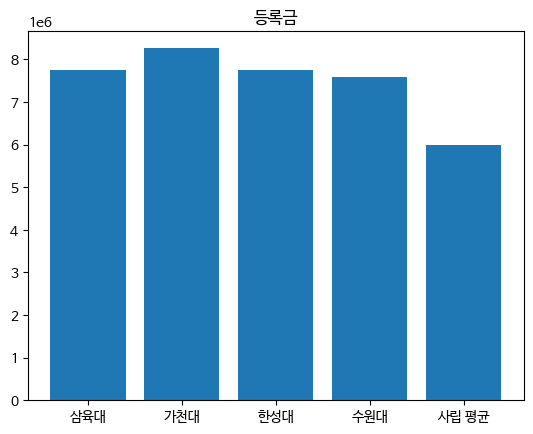

In [ ]:
name = ['삼육대', '가천대', '한성대', '수원대', '사립 평균']
num = [7760939,8263207,7741776,7595302, 5997361]
x = np.arange(5)
plt.bar(x,num)
plt.xticks(x,name)
plt.title('등록금')
plt.show()